In [30]:
from google.colab import files
uploaded = files.upload()

Saving ImpactOnWeight_dataset.xlsx to ImpactOnWeight_dataset (1).xlsx


In [31]:
import pandas as pd

df = pd.read_excel('ImpactOnWeight_dataset.xlsx')
df

,Timestamp,Column 2,1. Age (in years),2. Gender,3. Current Weight (in kg),"4. How many days per week do you exercise (gym, workout, yoga, etc.)?",5. Average duration of each workout session (in minutes),6. How would you describe the intensity of your workouts?,7. How many full meals do you eat per day?,"8. How many times per week do you eat processed or junk food (e.g., fast food, snacks)?",9. Do you eat fruits at least 3 times a week,"10. On average, how many steps do you walk per day?","11. Do you play any sports 2,3 times a week?","12. On average, how many hours do you sleep per night?",13. How many glasses of water do you drink per day?,Column 15,Column 16,Column 17
0,2025-08-07 00:13:54.229,NaN,18-25,Male,65-74,3-4,40-60,Moderate,2,2,Yes,Less than 2000,No,5-6,3-5,NaN,NaN,NaN
1,2025-08-07 00:16:40.583,NaN,18-25,Male,45-54,0,Less than 20,Low,3,4+,Yes,5000-7999,Yes,5-6,3-5,NaN,NaN,NaN
2,2025-08-07 00:35:00.551,NaN,18-25,Male,85-94,1-2,20-39,Low,3,4+,Yes,2000-4999,No,8+,3-5,NaN,NaN,NaN
3,2025-08-07 00:51:30.978,NaN,18-25,Male,45-54,3-4,40-60,Moderate,3,1,Yes,2000-4999,Yes,5-6,8+,NaN,NaN,NaN
4,2025-08-07 01:09:34.147,NaN,18-25,Male,55-64,1-2,20-39,Moderate,1,4+,No,Less than 2000,No,5-6,8+,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2025-10-04 00:39:49.453,NaN,26-35,Female,45-54,1-2,60+,High,4+,3,Yes,10000+,Yes,5-6,6-8,NaN,NaN,NaN
98,2025-10-04 00:40:29.563,NaN,18-25,Female,45-54,0,Less than 20,Low,3,1,No,Less than 2000,No,7-8,3-5,NaN,NaN,NaN
99,2025-10-04 00:41:14.235,NaN,56+,Male,94+,1-2,20-39,Moderate,3,0,No,Less than 2000,No,5-6,8+,NaN,NaN,NaN
100,2025-10-04 00:41:48.964,NaN,36-55,Male,65-74,3-4,40-60,Moderate,3,2,Yes,2000-4999,Yes,8+,6-8,NaN,NaN,NaN


#Project Brief:
- Analyze the lifestyle habits/demographics dataset to identify health & exercise trends among different age groups and genders.

##Business Questions:
1. What is the average weight of a person from different age groups and genders?
2. What's the intensity of workout of different age group people?
3. What's the relationship between days of exercise per week & duration of each workout session?
4. What is the weight of a person based on meals per day?
5. Which age group eats junk food most per week?
6. Which age or weight group person walks the most steps on regular?
7. How many hours does people of different age groups sleep?

#Initial EDA:
Usage of shape, info(), describe(), head() etc. functions to have an overview of data. Check null values, datatypes, no. of rows and columns, important metrics like mean, count, max etc.

In [32]:
df.shape

(102, 18)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                                                                                   Non-Null Count  Dtype         
---  ------                                                                                   --------------  -----         
 0   Timestamp                                                                                102 non-null    datetime64[ns]
 1   Column 2                                                                                 0 non-null      float64       
 2   1. Age (in years)                                                                        102 non-null    object        
 3   2. Gender                                                                                102 non-null    object        
 4   3. Current Weight (in kg)                                                                102 non-null    object        
 5   4. How many day

In [34]:
df.describe()

,Timestamp,Column 2,Column 16,Column 17
count,102,0.0,0.0,0.0
mean,2025-08-24 19:40:28.944245504,NaN,NaN,NaN
min,2025-08-07 00:13:54.229000,NaN,NaN,NaN
25%,2025-08-10 16:01:16.370500096,NaN,NaN,NaN
50%,2025-08-19 14:25:11.506499840,NaN,NaN,NaN
75%,2025-09-02 21:30:40.056000,NaN,NaN,NaN
max,2025-10-04 00:42:15.780000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN


In [35]:
df.columns

Index(['Timestamp', 'Column 2', '1. Age (in years)', '2. Gender',
       '3. Current Weight (in kg)',
       '4. How many days per week do you exercise (gym, workout, yoga, etc.)?',
       '5. Average duration of each workout session (in minutes)',
       '6. How would you describe the intensity of your workouts?',
       '7. How many full meals do you eat per day?',
       '8. How many times per week do you eat processed or junk food (e.g., fast food, snacks)?',
       '9. Do you eat fruits at least 3 times a week',
       '10. On average, how many steps do you walk per day? ',
       '11. Do you play any sports 2,3 times a week?',
       '12. On average, how many hours do you sleep per night?',
       ' 13. How many glasses of water do you drink per day?  ', 'Column 15',
       'Column 16', 'Column 17'],
      dtype='object')

#Data Cleaning and Preprocessing
- Cleaning the data by finding and removing Null values and duplicates. Dropping unnecessary columns, converting columns to appropriate datatypes where needed, and restructuring column names.

In [36]:
df.isnull().sum()

,0
Timestamp,0
Column 2,102
1. Age (in years),0
2. Gender,0
3. Current Weight (in kg),0
"4. How many days per week do you exercise (gym, workout, yoga, etc.)?",0
5. Average duration of each workout session (in minutes),0
6. How would you describe the intensity of your workouts?,0
7. How many full meals do you eat per day?,0
"8. How many times per week do you eat processed or junk food (e.g., fast food, snacks)?",0


In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.drop(columns=['Timestamp','Column 15','Column 16','Column 17','Column 2'], inplace=True)

In [39]:
df.head()

,1. Age (in years),2. Gender,3. Current Weight (in kg),"4. How many days per week do you exercise (gym, workout, yoga, etc.)?",5. Average duration of each workout session (in minutes),6. How would you describe the intensity of your workouts?,7. How many full meals do you eat per day?,"8. How many times per week do you eat processed or junk food (e.g., fast food, snacks)?",9. Do you eat fruits at least 3 times a week,"10. On average, how many steps do you walk per day?","11. Do you play any sports 2,3 times a week?","12. On average, how many hours do you sleep per night?",13. How many glasses of water do you drink per day?
0,18-25,Male,65-74,3-4,40-60,Moderate,2,2,Yes,Less than 2000,No,5-6,3-5
1,18-25,Male,45-54,0,Less than 20,Low,3,4+,Yes,5000-7999,Yes,5-6,3-5
2,18-25,Male,85-94,1-2,20-39,Low,3,4+,Yes,2000-4999,No,8+,3-5
3,18-25,Male,45-54,3-4,40-60,Moderate,3,1,Yes,2000-4999,Yes,5-6,8+
4,18-25,Male,55-64,1-2,20-39,Moderate,1,4+,No,Less than 2000,No,5-6,8+


In [40]:
df.rename(columns={
    '1. Age (in years)':'age',
    '2. Gender':'gender',
    '3. Current Weight (in kg)':'weight',
    '4. How many days per week do you exercise (gym, workout, yoga, etc.)?': 'days_of_exercise',
    '5. Average duration of each workout session (in minutes)': 'duration_of_workout',
    '6. How would you describe the intensity of your workouts?': 'workout_intensity',
    '7. How many full meals do you eat per day?': 'meals_per_day',
    '8. How many times per week do you eat processed or junk food (e.g., fast food, snacks)?': 'junkfood_per_week',
    '9. Do you eat fruits at least 3 times a week': 'fruit_intake',
    '10. On average, how many steps do you walk per day?': 'steps_per_day',
    '11. Do you play any sports 2,3 times a week?': 'sports_activity',
    '12. On average, how many hours do you sleep per night?': 'sleep_hours',
    '13. How many glasses of water do you drink per day?': 'water_intake',
    }, inplace=True)

In [41]:
df.rename(columns={
    '10. On average, how many steps do you walk per day? ': 'steps_per_day',
    ' 13. How many glasses of water do you drink per day?  ': 'water_intake'
}, inplace=True)
df.head()

,age,gender,weight,days_of_exercise,duration_of_workout,workout_intensity,meals_per_day,junkfood_per_week,fruit_intake,steps_per_day,sports_activity,sleep_hours,water_intake
0,18-25,Male,65-74,3-4,40-60,Moderate,2,2,Yes,Less than 2000,No,5-6,3-5
1,18-25,Male,45-54,0,Less than 20,Low,3,4+,Yes,5000-7999,Yes,5-6,3-5
2,18-25,Male,85-94,1-2,20-39,Low,3,4+,Yes,2000-4999,No,8+,3-5
3,18-25,Male,45-54,3-4,40-60,Moderate,3,1,Yes,2000-4999,Yes,5-6,8+
4,18-25,Male,55-64,1-2,20-39,Moderate,1,4+,No,Less than 2000,No,5-6,8+


#Feature Engineering:
- Feature engineering will be performed by transforming range-based, ordinal, and binary survey responses into numeric representations using predefined mappings. This enables meaningful aggregation, comparison, and relationship analysis while preserving the original categorical responses for transparency and interpretability.




In [42]:
weight_map = {
    'Under 45': 42,
    '45-54': 49.5,
    '55-64': 59.5,
    '65-74': 69.5,
    '75-84': 79.5,
    '85-94': 89.5,
    '94+': 100
}
df['weight_num'] = df['weight'].map(weight_map)

In [43]:
intensity_map = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}

exercise_days_map = {
    '0': 0,
    '1-2': 1.5,
    '3-4': 3.5,
    '5-6': 5.5
}
duration_map = {
    'Less than 20': 15,
    '20-39': 30,
    '40-60': 50,
    '60+': 70
}
steps_map = {
    'Less than 2000': 1500,
    '2000-4999': 3500,
    '5000-7999': 6500,
    '8000-9999': 9000,
    '10000+': 10000
}
sleep_map = {
    'Less than 5': 4,
    '5-6': 5.5,
    '7-8': 7.5,
    '8+': 8.5
}

df['workout_duration_num'] = df['duration_of_workout'].map(duration_map)
df['workout_intensity_num'] = df['workout_intensity'].map(intensity_map)
df['exercise_days_num'] = df['days_of_exercise'].map(exercise_days_map)

df['meals_per_day'].replace('4+', 4, inplace=True)
df['meals_per_day'] = pd.to_numeric(df['meals_per_day'])
df['junkfood_per_week'].replace('4+', 4, inplace=True)

df['steps_num'] = df['steps_per_day'].map(steps_map)
df['sleep_hours_num'] = df['sleep_hours'].map(sleep_map)

df[['steps_num','sleep_hours_num','workout_duration_num','workout_intensity_num','exercise_days_num']].head()

/tmp/ipython-input-475689382.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meals_per_day'].replace('4+', 4, inplace=True)
/tmp/ipython-input-475689382.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['meals_per_day'].replace('4+', 4, inplace=True)
/tmp/ipython-input-475689382.py:39

,steps_num,sleep_hours_num,workout_duration_num,workout_intensity_num,exercise_days_num
0,1500,5.5,50,2,3.5
1,6500,5.5,15,1,NaN
2,3500,8.5,30,1,1.5
3,3500,5.5,50,2,3.5
4,1500,5.5,30,2,1.5


#EDA/Analysis & Visualization
- In this section the business questions will be answered through aggregations, grouping, & relationships between features. Also visualizations will be created to better understand results of questions and gain insights from data.

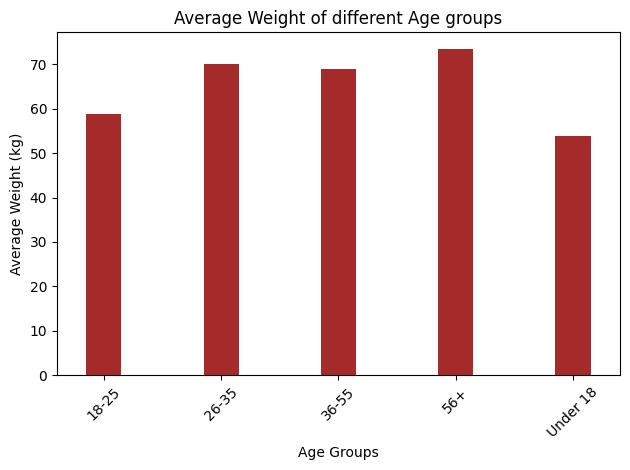

In [44]:
# 1. What is the average weight of persons of different age groups?
import matplotlib.pyplot as plt
import seaborn as sns

avgWeightPerAge = df.groupby('age')['weight_num'].mean()

avgWeightPerAge.plot(kind='bar',width=0.3, color='brown',rot=45)
plt.ylabel('Average Weight (kg)')
plt.xlabel('Age Groups')
plt.title('Average Weight of different Age groups')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Duration of Workout Session (minutes)')

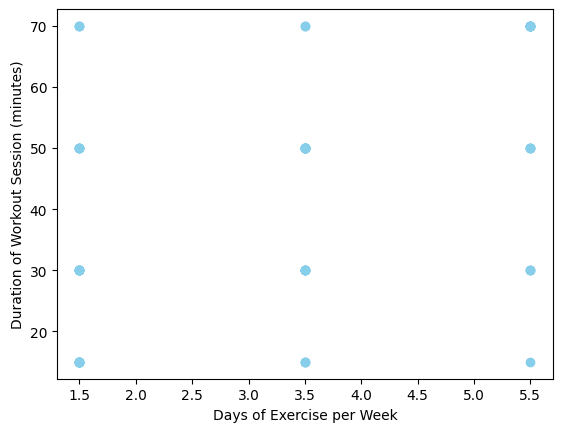

In [45]:
# 2. What's the relationship btw days of exercise per week & duration of each workout session?

plt.scatter(df['exercise_days_num'], df['workout_duration_num'], color='skyblue')
plt.xlabel('Days of Exercise per Week')
plt.ylabel('Duration of Workout Session (minutes)')

In [46]:
corr = df['exercise_days_num'].corr(df['workout_duration_num'])
corr

np.float64(0.4908515756373261)

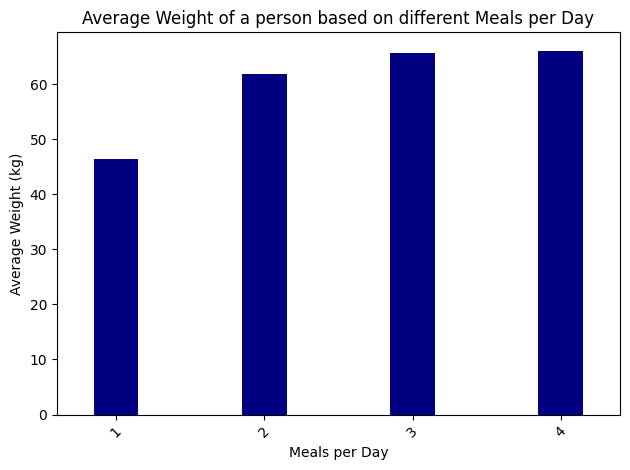

In [47]:
# 3. What is the weight of person based on meals per day?
avgWeight = df.groupby('meals_per_day')['weight_num'].mean()

avgWeight.plot(kind='bar',width=0.3, color='navy',rot=45)
plt.ylabel('Average Weight (kg)')
plt.xlabel('Meals per Day')
plt.title('Average Weight of a person based on different Meals per Day')
plt.tight_layout()
plt.show()

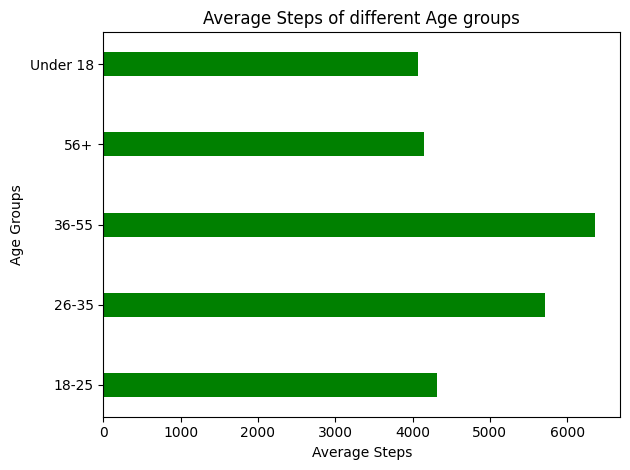

In [48]:
#4. Which age group person walks the most steps on regular?

mostWalkersAge = df.groupby('age')['steps_num'].mean()
mostWalkersWeight = df.groupby('weight')['steps_num'].mean()

mostWalkersAge.plot(kind='barh',width=0.3, color='green')
plt.xlabel('Average Steps')
plt.ylabel('Age Groups')
plt.title('Average Steps of different Age groups')
plt.tight_layout()
plt.show()

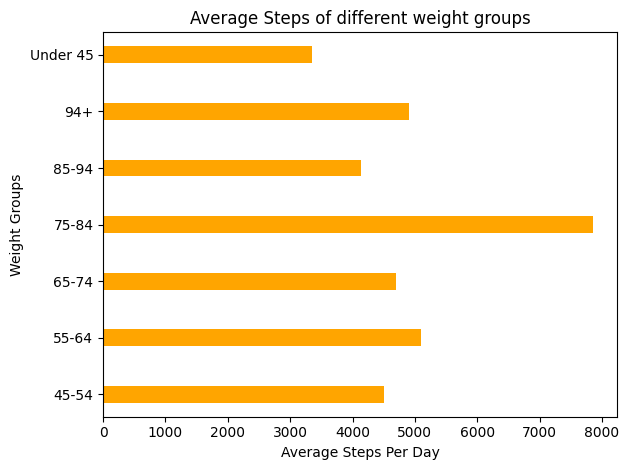

In [49]:
#5. Which weight group person walks the most steps on regular?

mostWalkersWeight.plot(kind='barh',width=0.3, color='orange')
plt.xlabel('Average Steps Per Day')
plt.ylabel('Weight Groups')
plt.title('Average Steps of different weight groups')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Sleep Hours of different Age')

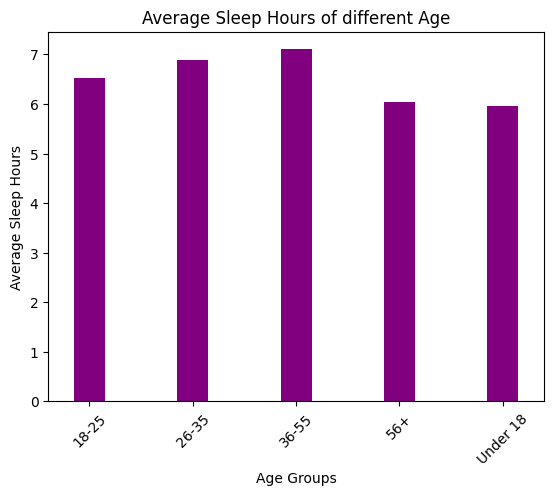

In [50]:
#6. What is the avg no. of sleep hours of different age groups?
avgSleep = df.groupby('age')['sleep_hours_num'].mean()

avgSleep.plot(kind='bar',width=0.3, color='purple',rot=45)
plt.ylabel('Average Sleep Hours')
plt.xlabel('Age Groups')
plt.title('Average Sleep Hours of different Age')

#Insights:
1. Individuals aged 56+ have the highest average weight at approximately 75 kg, while younger age groups show lower average weights.

2. Analysis indicates no strong relationship between the number of exercise days per week and workout session duration.

3. Individuals consuming 3–4 meals per day have a higher average weight (around 65 kg) compared to those consuming 1–2 meals per day, who show lower average weights.

4. Participants in the 36–55 age group record the highest average daily step count, at approximately 6,500 steps per day.

5. Individuals within the 75–84 kg weight range walk the most on average, with daily step counts around 7,500 steps.

6. Average sleep duration is highest among individuals aged 36–55, at approximately 7 hours per night.